#Exp-10 : Texture Analysis based on GLCM

Name : N U Praneeth Reddy

Reg.No : 21BAI1500

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import data
import cv2

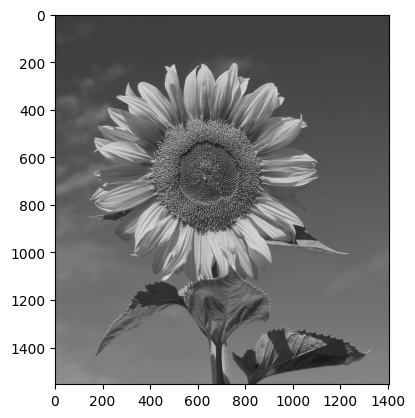

In [2]:
image = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

Task-1

Text(0.5, 0, 'Original Image With Patches')

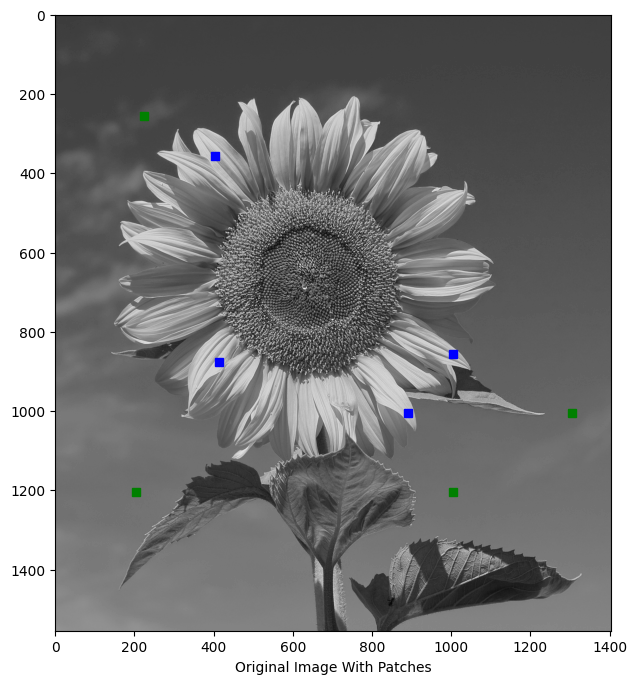

In [3]:
PATCH_SIZE = 10

# Select some patches from Sky areas (Background) of the image
Sky_locations = [(250,220), (1200,200), (1200,1000), (1000,1300)]
Sky_patches = []
for loc in Sky_locations:
    Sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# Select some patches on the Flower area (Foreground) of the image
flower_locations = [(350,400), (870,410), (850,1000), (1000,885)]
flower_patches = []
for loc in flower_locations:
    flower_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# Create the figure
fig = plt.figure(figsize=(8, 8))

# Display original image with locations of patches
plt.imshow(image, cmap=plt.cm.gray,
            vmin=0, vmax=255)
for (y, x) in Sky_locations:
    plt.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in flower_locations:
    plt.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
plt.xlabel('Original Image With Patches')


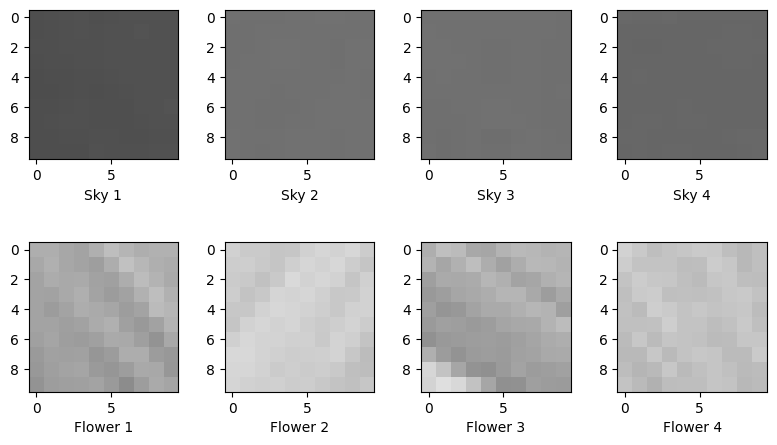

In [4]:
fig = plt.figure(figsize=(8, 5))
# Display Sky patches
for i, patch in enumerate(Sky_patches):
    ax = fig.add_subplot(2, 4, i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel(f"Sky {i + 1}")

# Display Flower patches
for i, patch in enumerate(flower_patches):
    ax = fig.add_subplot(2, 4, i + 5)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel(f"Flower {i + 1}")
plt.tight_layout()
plt.show()

TASK-2

In [5]:
# Compute GLCM properties for each patch
xs = []
ys = []
for i, patch in enumerate(Sky_patches + flower_patches):
    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])


# Display minimum and maximum values for each patch in Sky
print("Sky Patches:")
for i, patch in enumerate(Sky_patches):
    patch_min = patch.min()
    patch_max = patch.max()
    print(f"Sky {i + 1} - Min: {patch_min}, Max: {patch_max}")
print()  # Insert a new line

# Display minimum and maximum values for each patch in Flower
print("Flower Patches:")
for i, patch in enumerate(flower_patches):
    patch_min = patch.min()
    patch_max = patch.max()
    print(f"Flower {i + 1} - Min: {patch_min}, Max: {patch_max}")


Sky Patches:
Sky 1 - Min: 77, Max: 83
Sky 2 - Min: 111, Max: 114
Sky 3 - Min: 110, Max: 113
Sky 4 - Min: 101, Max: 104

Flower Patches:
Flower 1 - Min: 140, Max: 193
Flower 2 - Min: 188, Max: 217
Flower 3 - Min: 144, Max: 223
Flower 4 - Min: 177, Max: 210


Task-3

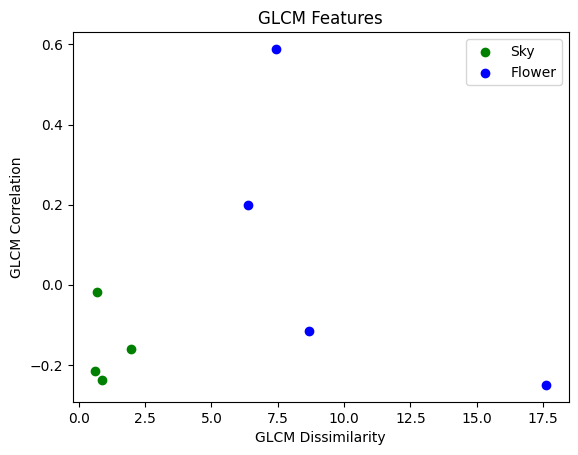

In [6]:
# Plot scatter plot
plt.scatter(xs[:len(Sky_patches)], ys[:len(Sky_patches)], color='green', label='Sky')
plt.scatter(xs[len(Sky_patches):], ys[len(Sky_patches):], color='blue', label='Flower')
plt.xlabel('GLCM Dissimilarity')
plt.ylabel('GLCM Correlation')
plt.legend()
plt.title('GLCM Features')
plt.show()